In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
import sys
from helita.io import lp
from scipy.io.idl import readsav
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import cm
import sunpy.cm as cmaps
from sklearn.impute import SimpleImputer
import h5py
from matplotlib.path import Path
from matplotlib.image import NonUniformImage
from tqdm import tqdm
import cmasher as cmr
from matplotlib.path import Path
import matplotlib.colors as colors

In [2]:
dpath_energy = '/mn/stornext/d9/souvikb/High_impact/'
dpath_simulation ='/mn/stornext/d5/juanms/mpi3druns/2Druns/genohm/rain/l2d90x40rvk/sim_data_rh_it=280-369.hdf5'

In [98]:
energy = h5py.File(dpath_energy+'spicule_energy_it=280-369.hdf5', 'r')
e = energy['e']
input_sim = h5py.File(dpath_simulation,'r')
temp_juan=input_sim['temperature']
vel_juan=input_sim['velocity_z']
z    = input_sim['z']#Height (m)
x    = input_sim['x']#Spatial [m]
y    = input_sim['y']# time []

In [4]:
#Heating terms
Q = h5py.File(dpath_energy+'spicule_qterms_it=280-369.hdf5','r')
Qjamb = Q['qjamb']
Qgenrad =Q['qgenrad']
Qjoule = Q['qjoule']
Qpdv =Q['qpdv']
Qspitz=Q['qspitz']
Qvisc =Q['qvisc']

In [5]:
rho = h5py.File(dpath_energy+'density_it=280-369.hdf5', 'r')
p = rho['rho']
p.shape

(6930, 90, 1554)

In [100]:
#Reading the X (Mm), Z (Mm) and Y (sec) information from the simulation
z1 = z[0,:]/1e6
x_extent = x[4320:5759]/1e6
#extend = (x1.min(),x1.max(),z1.max(),z1.min())
x2 = y[:]*10 -y[0]*10
extend1 = (x2.min(),x2.max(),z1.max(),z1.min())
# x_pos1=4865-4176
# x_pos2=4980-4176
print(e.shape)

(6930, 90, 1554)


<ipython-input-34-65654d362a65>:8: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(np.log10(np.abs(amb_part).T),cmap='jet',vmin=-1,vmax=9.2,norm=colors.PowerNorm(gamma=1.2))


Text(0.5, 1.0, 'Qjamb')

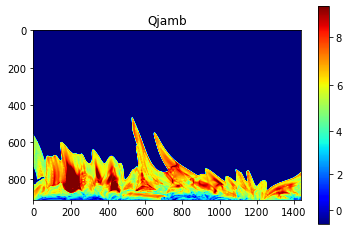

In [34]:
scan=37
heat = (1e-20+Qjamb[4320:5759,scan,500:1410])*1e3
den = (1e-20+p[4320:5759,scan,500:1410])*1e-7
amb_part = heat/den
# plt.imshow(np.log10(np.abs(1e-10+Qjamb[4320:5759,38,500:1410]).T),cmap='jet',extent=[x_extent[0],x_extent[-1],z1[1410],z1[500]]
# ,vmin=-10,vmax=-7)
#plt.imshow(np.log10(np.abs(amb_part).T)),cmap='jet')
plt.imshow(np.log10(np.abs(amb_part).T),cmap='jet',vmin=-1,vmax=9.2,norm=colors.PowerNorm(gamma=1.2))
plt.colorbar()
plt.title('Qjamb')

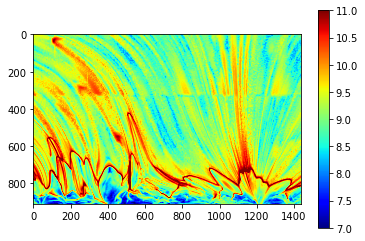

In [50]:
scan=14
Summed_Q = Qjoule[4320:5759,scan,500:1410]+Qjamb[4320:5759,scan,500:1410]+Qvisc[4320:5759,scan,500:1410]+Qspitz[4320:5759,scan,500:1410]
Summed_Q = (1e-20+Summed_Q)*1e3
den = (1e-20+p[4320:5759,scan,500:1410])*1e-7

heat_part = Summed_Q/den
plt.imshow(np.log10(np.abs(heat_part).T),cmap='jet',vmin=7,vmax=11)
plt.colorbar()

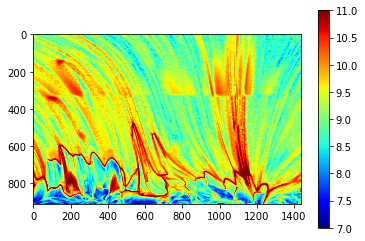

In [51]:
scan=38
Summed_Q = Qjoule[4320:5759,scan,500:1410]+Qjamb[4320:5759,scan,500:1410]+Qvisc[4320:5759,scan,500:1410]+Qspitz[4320:5759,scan,500:1410]
Summed_Q = (1e-20+Summed_Q)*1e3
den = (1e-20+p[4320:5759,scan,500:1410])*1e-7

heat_part = Summed_Q/den
plt.imshow(np.log10(np.abs(heat_part).T),cmap='jet',vmin=7,vmax=11)
plt.colorbar()

In [52]:
Qjoule[4320:5759,scan,500:1410].shape

(1439, 910)

In [55]:
mask_contour=np.zeros((1439,910))
temp_for_contour = temp_juan[0,4320:5759,14,500:1410]
w_pixels = np.where(temp_for_contour<=80000)
mask_contour[w_pixels]=1.

<ipython-input-105-7891b738a6d0>:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(heat_part).T),cmap='jet',vmin=6,vmax=10.5)


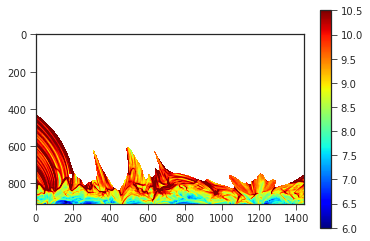

In [105]:
scan=0
Summed_Q = Qjoule[4320:5759,scan,500:1410]+Qjamb[4320:5759,scan,500:1410]+Qvisc[4320:5759,scan,500:1410]+Qspitz[4320:5759,scan,500:1410]
Summed_Q = (1e-20+Summed_Q)*1e3
den = (1e-20+p[4320:5759,scan,500:1410])*1e-7

heat_part = (Summed_Q/den)*mask_contour
plt.imshow(np.log10(np.abs(heat_part).T),cmap='jet',vmin=6,vmax=10.5)
plt.colorbar()

<ipython-input-89-37e3c7304d4b>:23: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(heat_part).T),cmap='jet',vmin=6,vmax=10.5,extent=[x_extent[0],x_extent[-1],z1[1410],z1[500]])


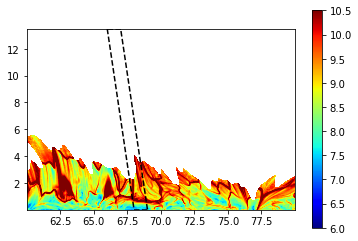

In [89]:
point1 = [68.0,0.006] #Checking the ROI
point2 = [69.0,0.006]
point3 = [67.0,13.49]
point4 = [66.0,13.49]
x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 =[point2[0],point3[0]]
y_values2 = [point2[1],point3[1]]

x_values3 =[point3[0],point4[0]]
y_values3 = [point3[1],point4[1]]

x_values4 = [point4[0],point1[0]]
y_values4 = [point4[1],point1[1]]

scan=38
Summed_Q = Qjoule[4320:5759,scan,500:1410]+Qjamb[4320:5759,scan,500:1410]+Qvisc[4320:5759,scan,500:1410]+Qspitz[4320:5759,scan,500:1410]
Summed_Q = (1e-20+Summed_Q)*1e3
den = (1e-20+p[4320:5759,scan,500:1410])*1e-7

heat_part = (Summed_Q/den)*mask_contour
plt.imshow(np.log10(np.abs(heat_part).T),cmap='jet',vmin=6,vmax=10.5,extent=[x_extent[0],x_extent[-1],z1[1410],z1[500]])
plt.colorbar()
plt.plot(x_values1, y_values1,linestyle='--',color='black')
plt.plot(x_values2, y_values2,linestyle='--',color='black')
plt.plot(x_values3, y_values3,linestyle='--',color='black')
plt.plot(x_values4, y_values4,linestyle='--',color='black')



# Temperature ROI and space-time

In [62]:
x_slice =[4320,5759]
y_slice =[500,1410]
roi_spicule_temp = np.zeros((x_slice[1]-x_slice[0],y_slice[1]-y_slice[0],90))
for time in tqdm(range(90)):
    nx, ny = 910, 1439
    poly_verts =[(910,645), (910,573), (0,429), (0,501)]
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(poly_verts)
    grid = path.contains_points(points)
    grid = np.array(grid.reshape((ny,nx)))
    roi_spicule_temp[:,:,time]=grid*temp_juan[0,4320:5759,time,500:1410]

100%|██████████| 90/90 [00:43<00:00,  2.09it/s]


In [63]:
T_xt_slit = np.mean(roi_spicule_temp,axis=0)

# Energy ROI and space-time

In [68]:
x_slice =[4320,5759]
y_slice =[500,1410]
roi_spicule = np.zeros((x_slice[1]-x_slice[0],y_slice[1]-y_slice[0],90))
for time in tqdm(range(90)):
    nx, ny = 910, 1439
    poly_verts =[(910,645), (910,573), (0,429), (0,501)]
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(poly_verts)
    grid = path.contains_points(points)
    grid = np.array(grid.reshape((ny,nx)))
    mask_contour=np.zeros((1439,910))
    temp_for_contour = temp_juan[0,4320:5759,time,500:1410]
    w_pixels = np.where(temp_for_contour<=80000)
    mask_contour[w_pixels]=1.
    roi_spicule[:,:,time]=grid*e[4320:5759,time,500:1410]*mask_contour*1e5 #1e5 is to convert Bifrost units to CGS
    

100%|██████████| 90/90 [02:45<00:00,  1.84s/it]


In [69]:
E_xt_slit = np.mean(roi_spicule,axis=0)

# Summed heat ROI and space-time

In [70]:
x_slice =[4320,5759]
y_slice =[500,1410]
roi_heat = np.zeros((x_slice[1]-x_slice[0],y_slice[1]-y_slice[0],90))
for scan in tqdm(range(90)):
    nx, ny = 910, 1439
    poly_verts =[(910,645), (910,573), (0,429), (0,501)]
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(poly_verts)
    grid = path.contains_points(points)
    grid = np.array(grid.reshape((ny,nx)))
    mask_contour=np.zeros((1439,910))
    temp_for_contour = temp_juan[0,4320:5759,scan,500:1410]
    w_pixels = np.where(temp_for_contour<=80000)
    mask_contour[w_pixels]=1.
    Summed_Q = Qjoule[4320:5759,scan,500:1410]+Qjamb[4320:5759,scan,500:1410]+Qvisc[4320:5759,scan,500:1410]+Qspitz[4320:5759,scan,500:1410]
    Summed_Q = (1e-20+Summed_Q)*1e3 #1e-20 is for avoiding numerical zeros and 1e3 is to convert to CGS
    den = (1e-20+p[4320:5759,scan,500:1410])*1e-7 # Same here. 
    heat_part = (Summed_Q/den)*mask_contour
    roi_heat[:,:,scan] = grid*heat_part

100%|██████████| 90/90 [09:32<00:00,  6.36s/it]


In [71]:
heat_xt_slit = np.mean(roi_heat,axis=0)

In [92]:
plt.imshow((T_xt_slit[200:,:]),aspect=0.05,cmap=cmr.rainforest,vmax=1.6e4,norm=colors.PowerNorm(gamma=0.7))
plt.colorbar()

<ipython-input-92-4857a540cc08>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow((T_xt_slit[200:,:]),aspect=0.05,cmap=cmr.rainforest,vmax=1.6e4,norm=colors.PowerNorm(gamma=0.7))


<ipython-input-82-f7005d709e53>:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(E_xt_slit[200:,:]),aspect=0.05,cmap ='inferno',vmax=2,vmin=-3)


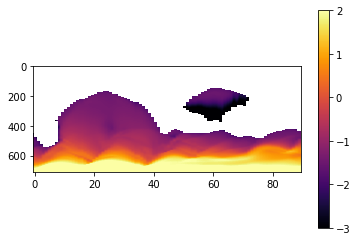

In [82]:
plt.imshow(np.log10(E_xt_slit[200:,:]),aspect=0.05,cmap ='inferno',vmax=2,vmin=-3)
plt.colorbar()

<ipython-input-90-b36032421918>:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(heat_xt_slit),cmap='jet',aspect=0.05,vmin=6,vmax=10.5)
<ipython-input-90-b36032421918>:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(heat_xt_slit),cmap='jet',aspect=0.05,vmin=6,vmax=10.5)


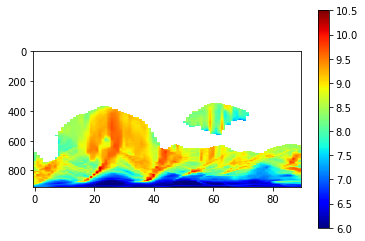

In [90]:
plt.imshow(np.log10(heat_xt_slit),cmap='jet',aspect=0.05,vmin=6,vmax=10.5)
plt.colorbar()

  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-115-6c0030a1294c>:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im1=axs[1].imshow((T_xt_slit[:,:50]/1e3),aspect='auto',cmap=cmr.rainforest,vmax=16,norm=colors.PowerNorm(gamma=0.7),extent=[x2[0],x2[50],z1[1410],z1[500]])
<ipython-input-115-6c0030a1294c>:40: RuntimeWarning: divide by zero encountered in log10
  im2.set_data(x[4320:5759]/1e6,z1[1410:500:-1],np.flipud(np.squeeze(np.log10((e[4320:5759,scan,500:1410]*mask_contour).T*1e5))))
<ipython-input-115-6c0030a1294c>:51: RuntimeWarning: divide by zero encountered in log10
  im3=axs[3].imshow(np.log10(E_xt_slit[:,:50]),aspect='auto',cmap ='plasma',vmin=-3,vmax=2,extent=[x2[0],x2[50],z1[1410],z1[500]])
<ipython-input-115-6c0030a1294c>:68: RuntimeWarning: divide by zero encountered in log10
  im2.set_data(x[432

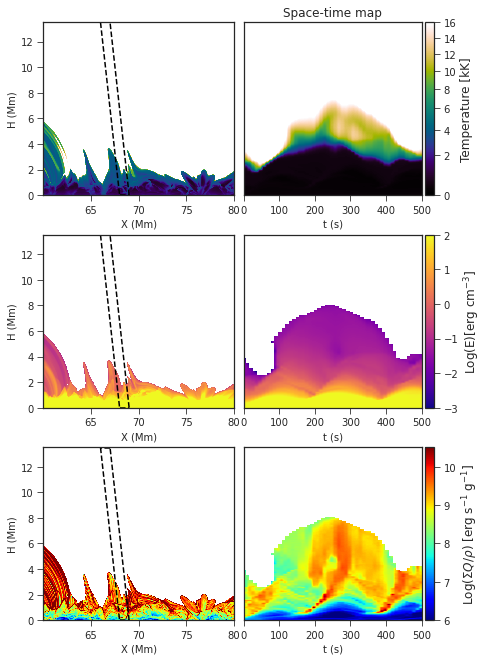

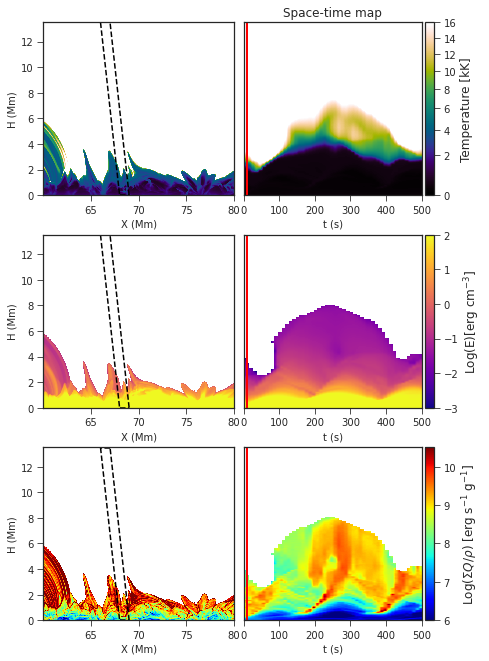

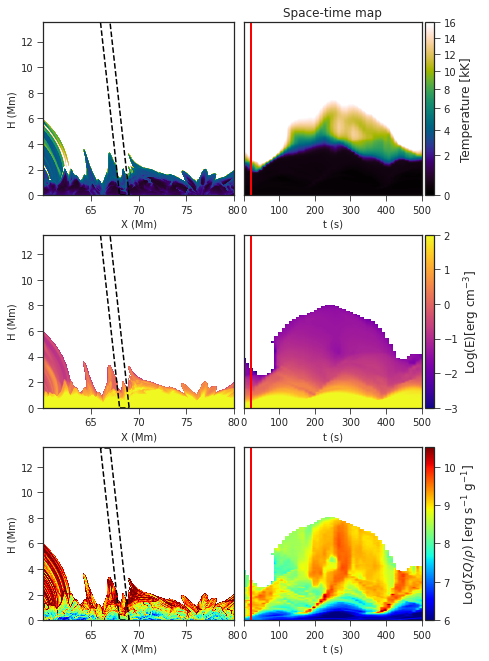

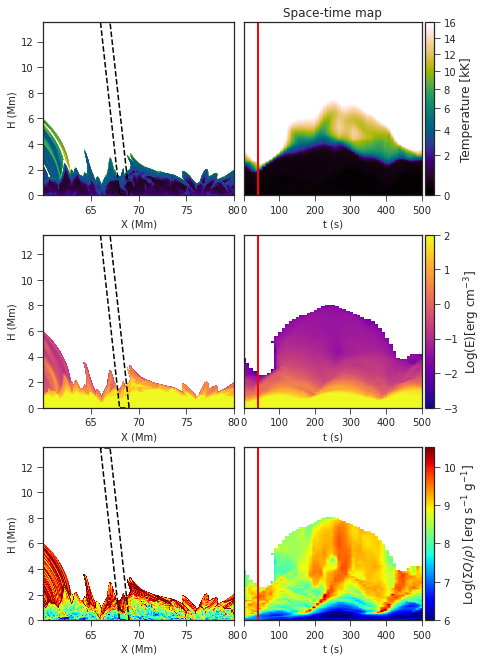

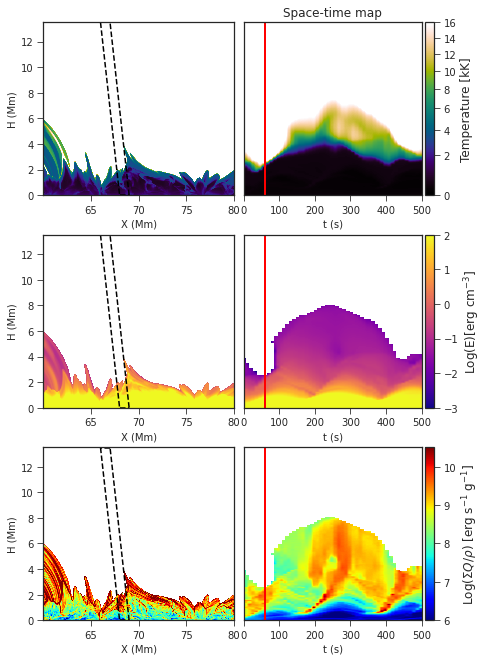

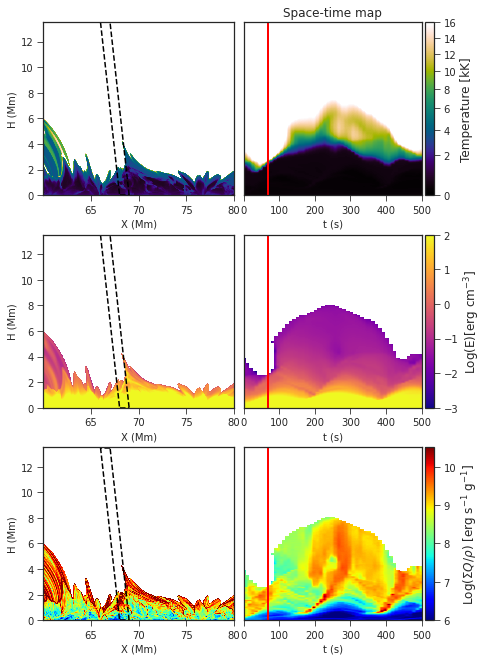

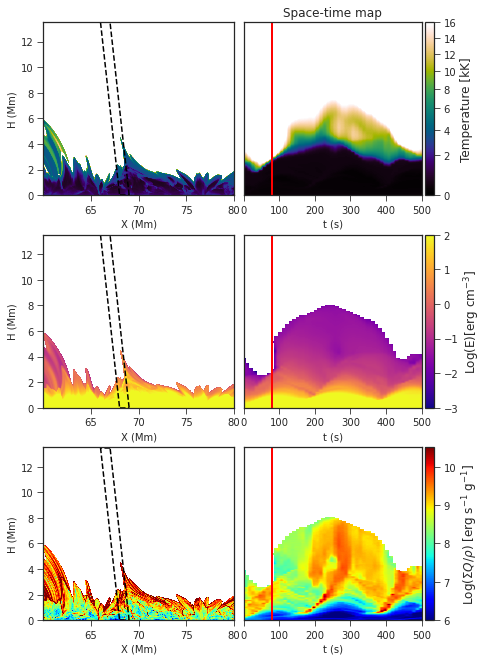

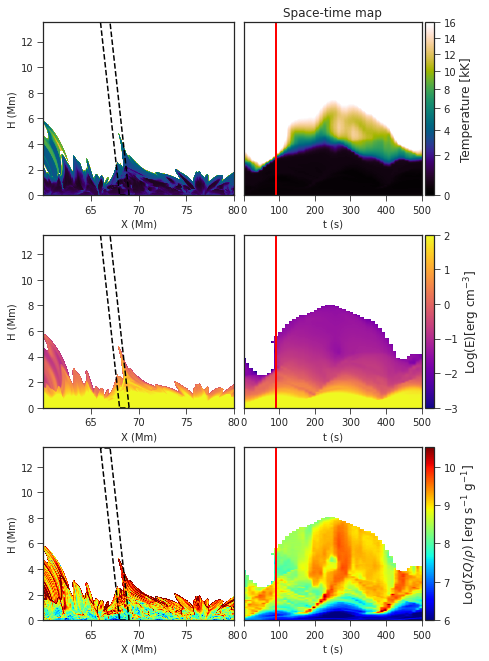

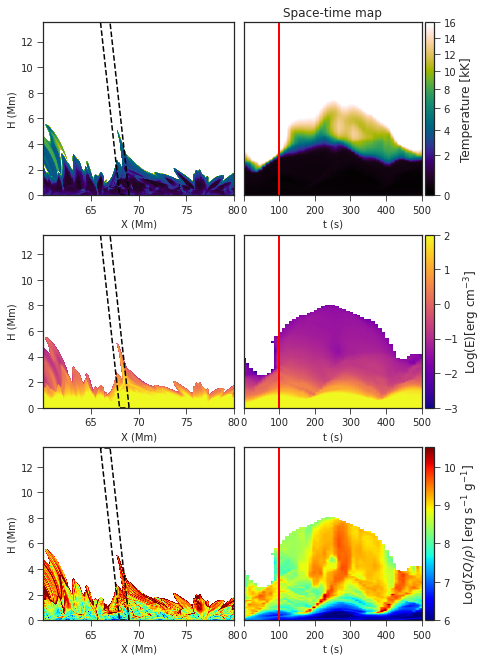

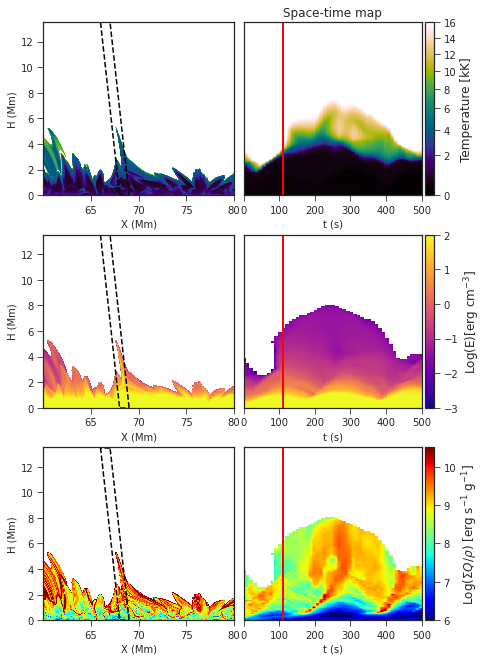

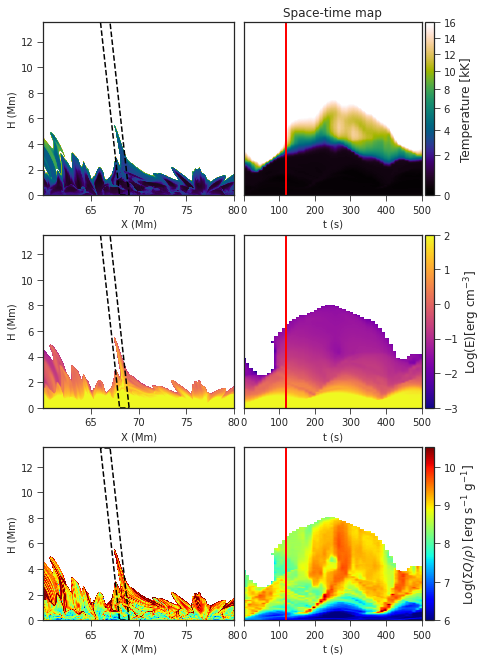

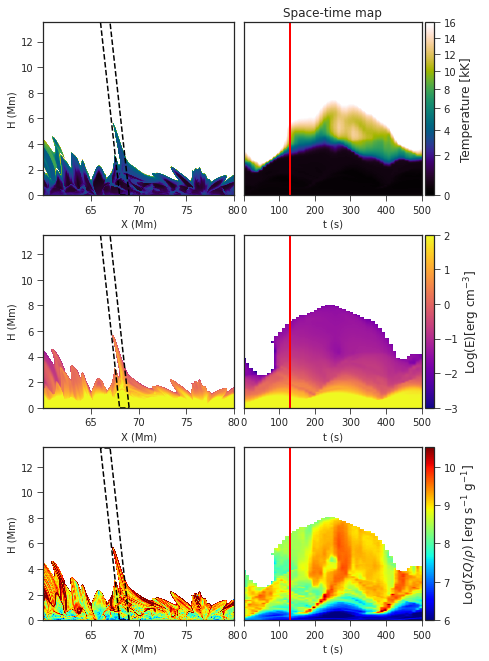

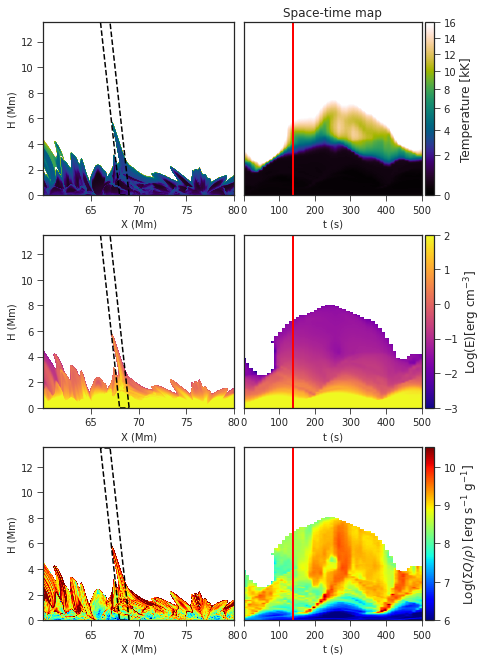

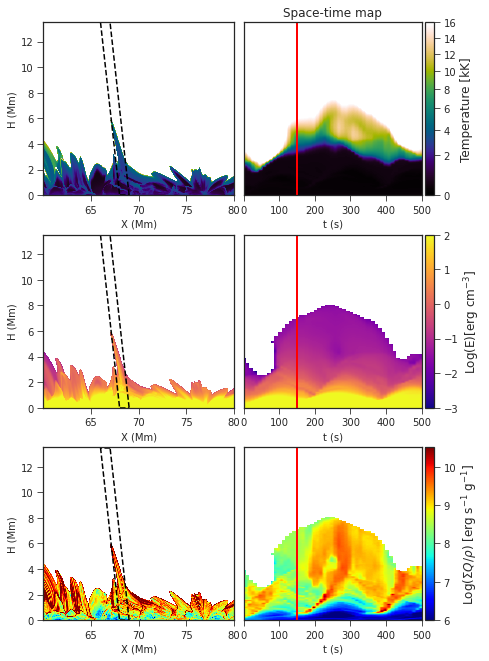

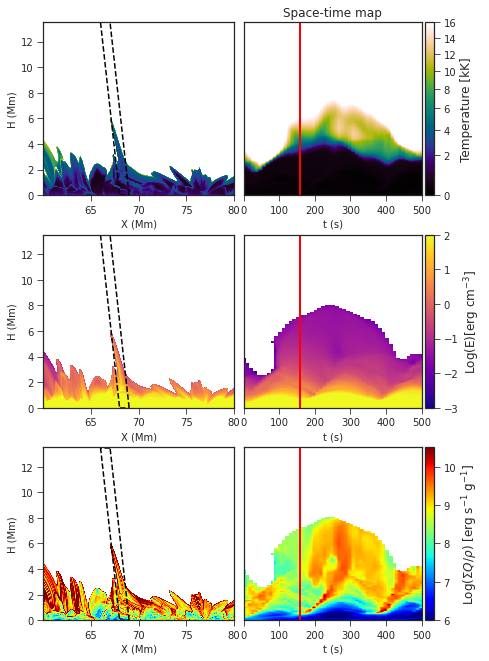

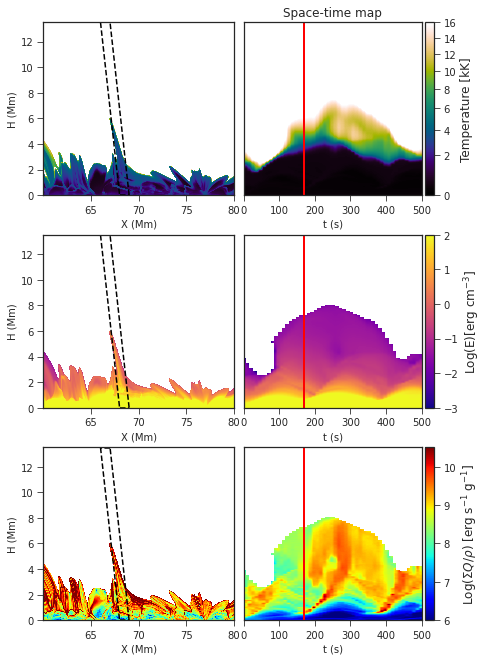

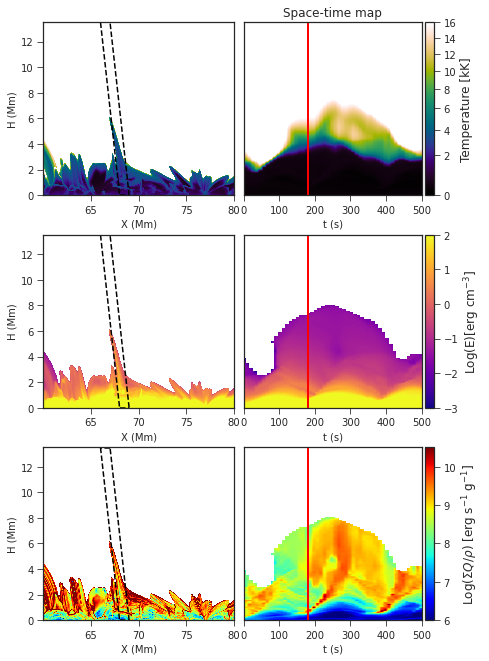

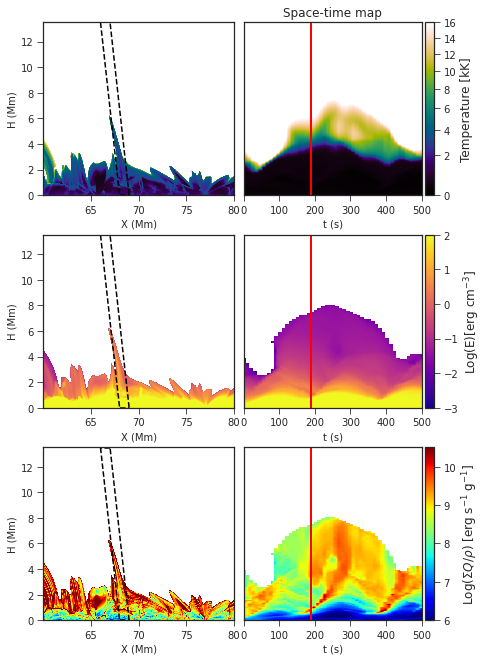

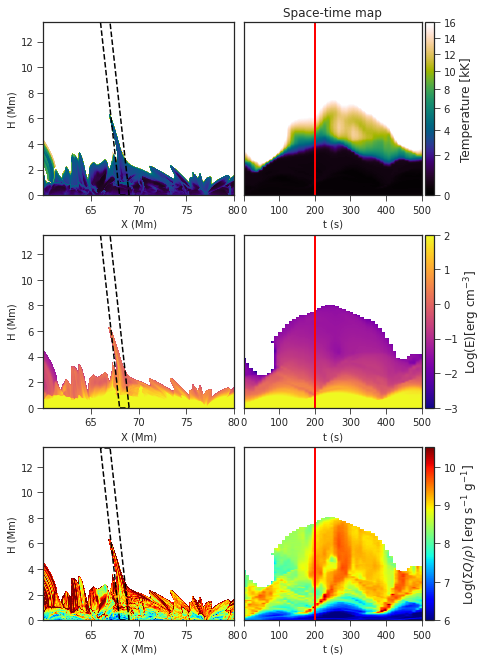

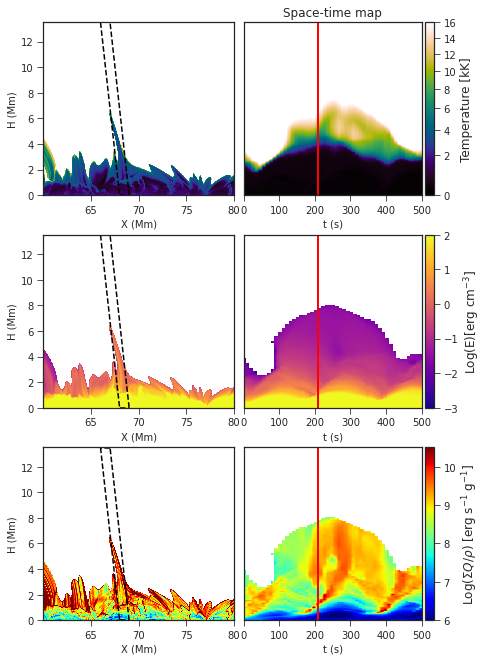

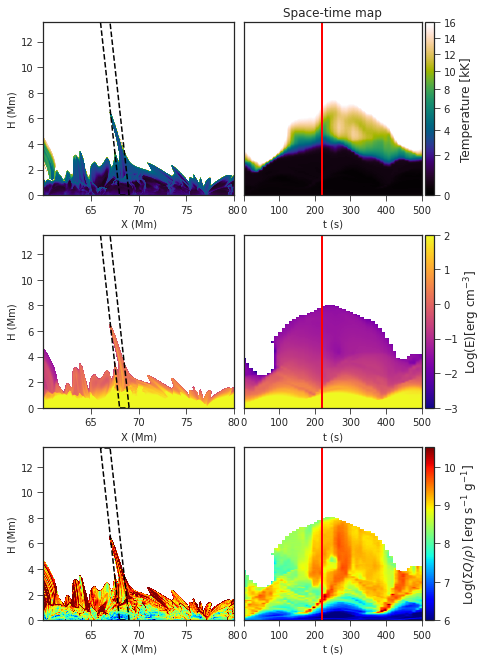

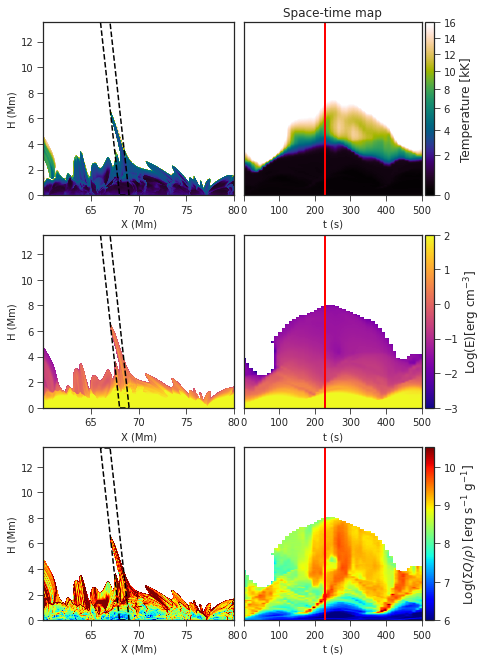

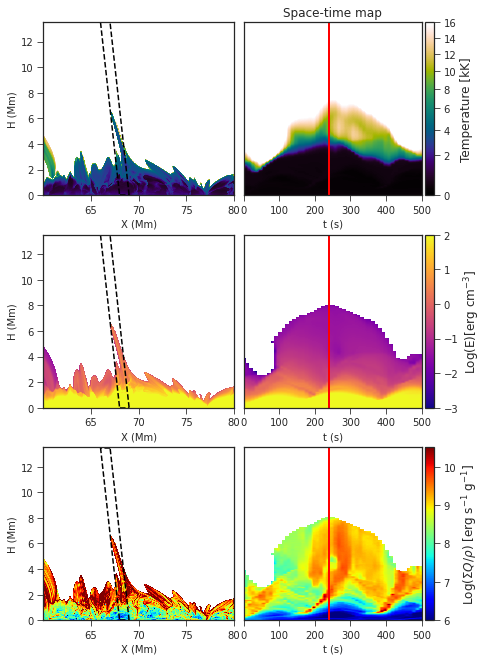

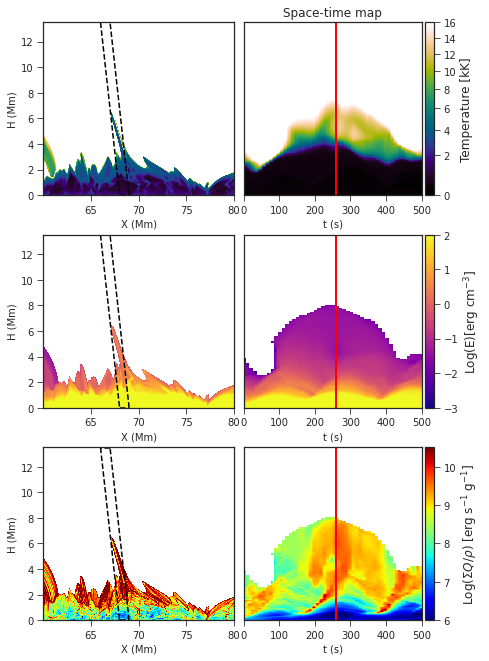

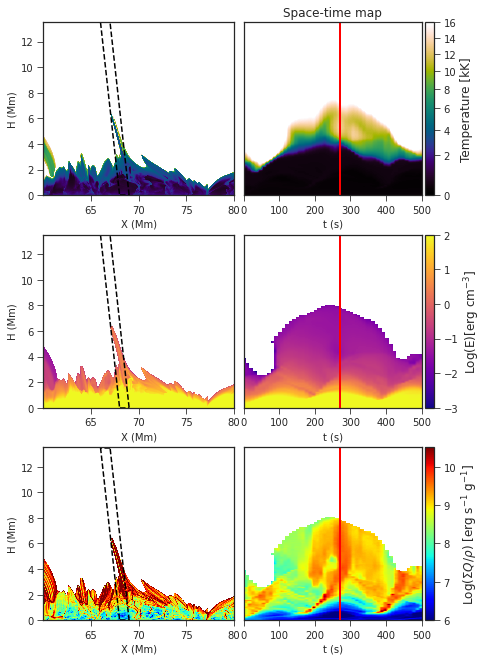

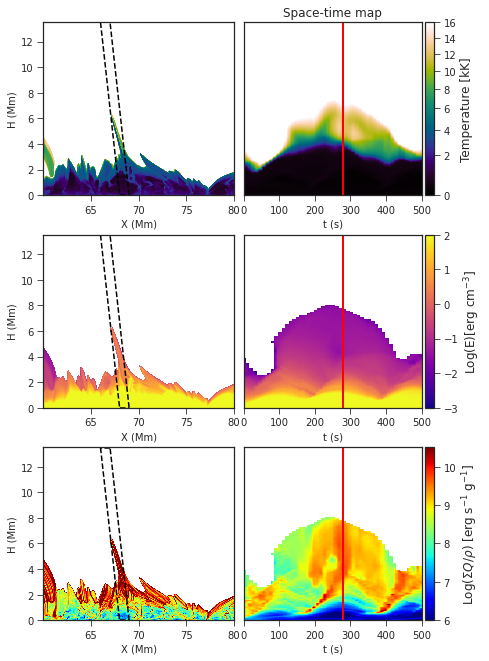

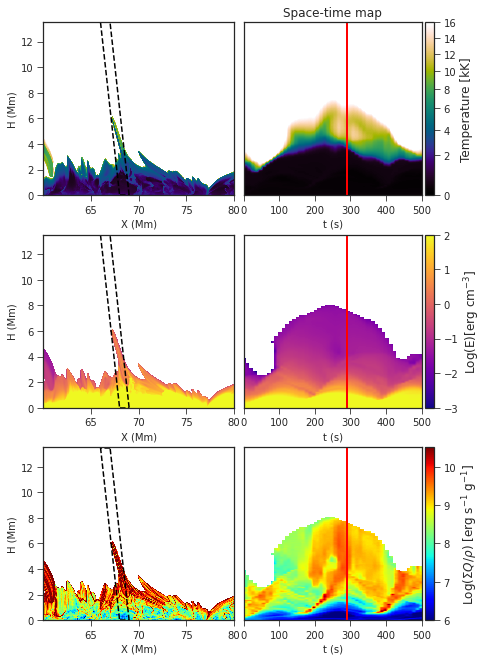

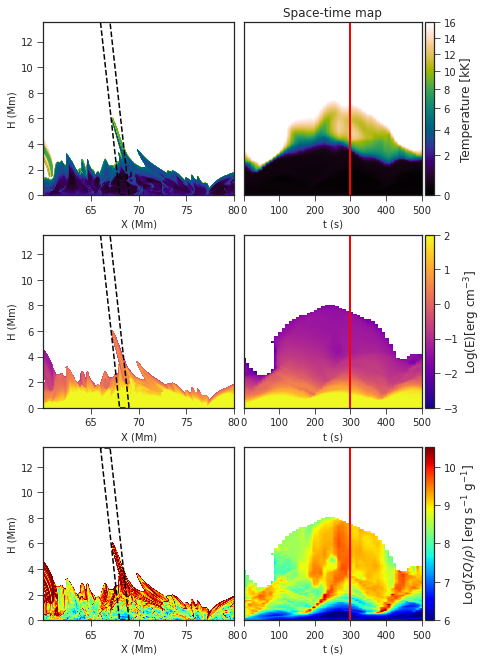

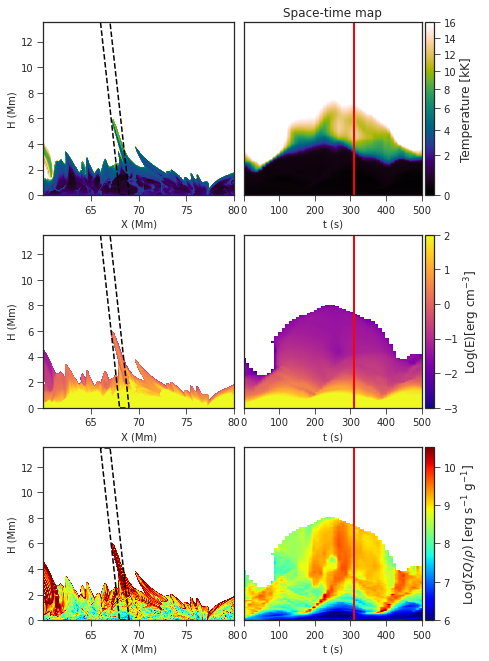

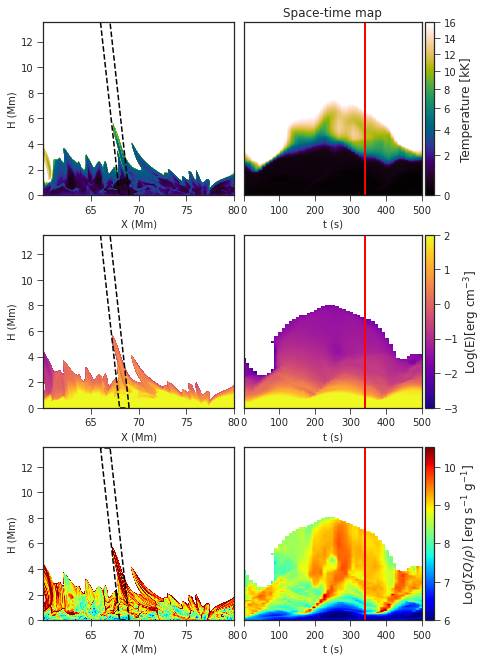

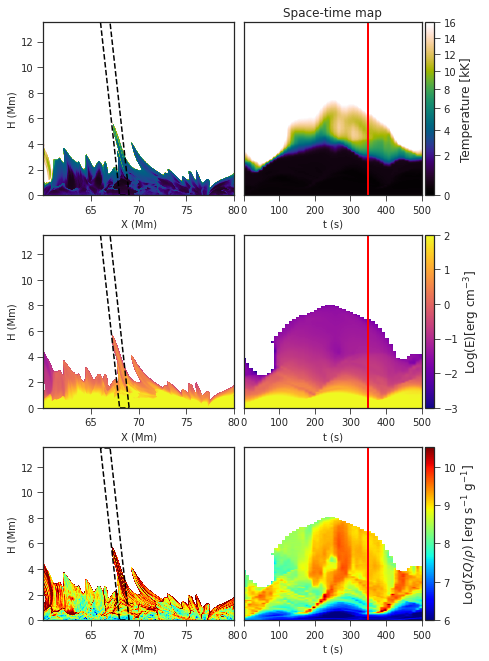

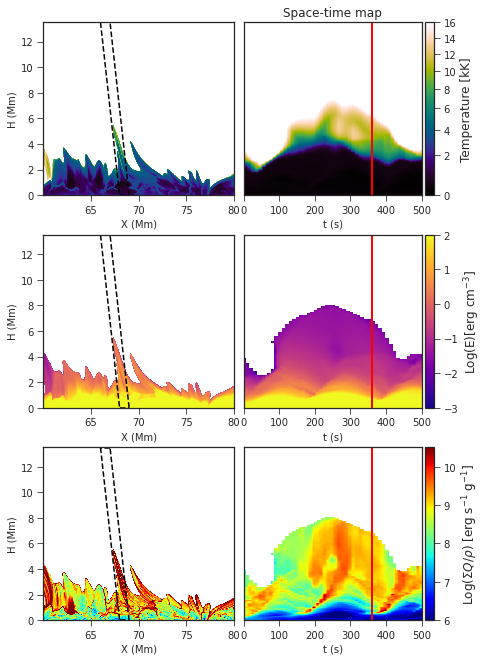

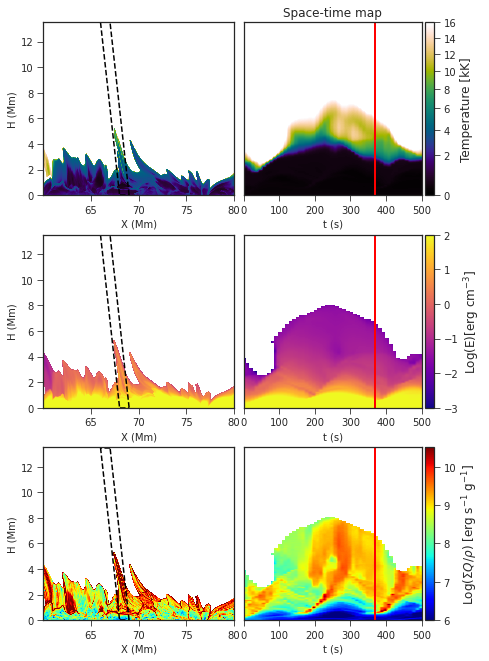

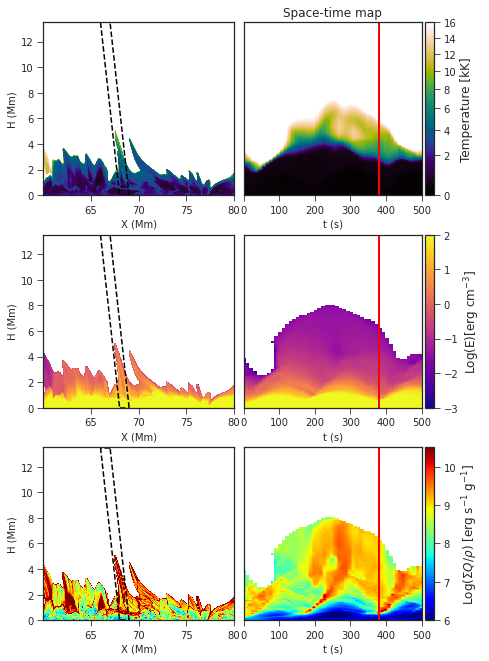

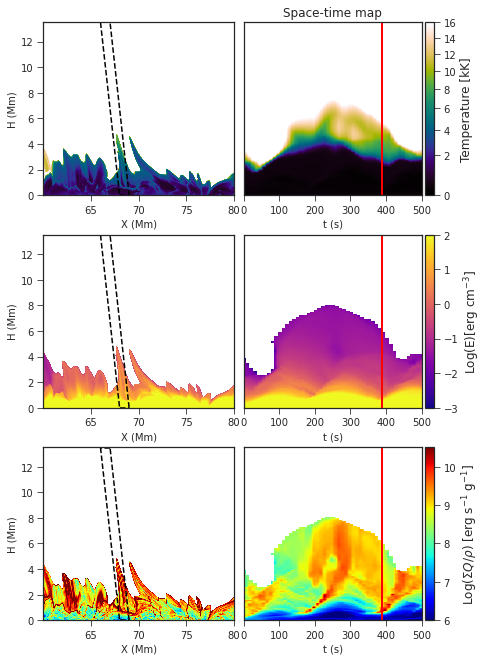

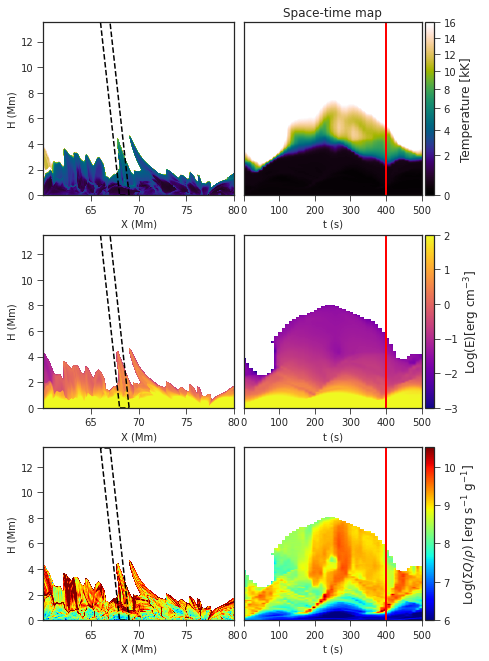

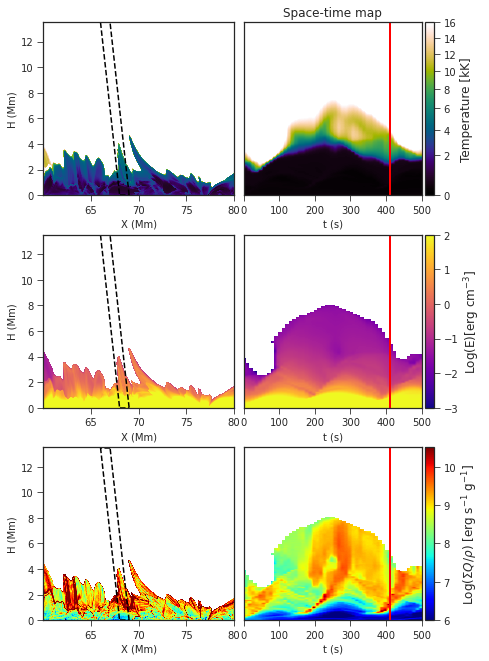

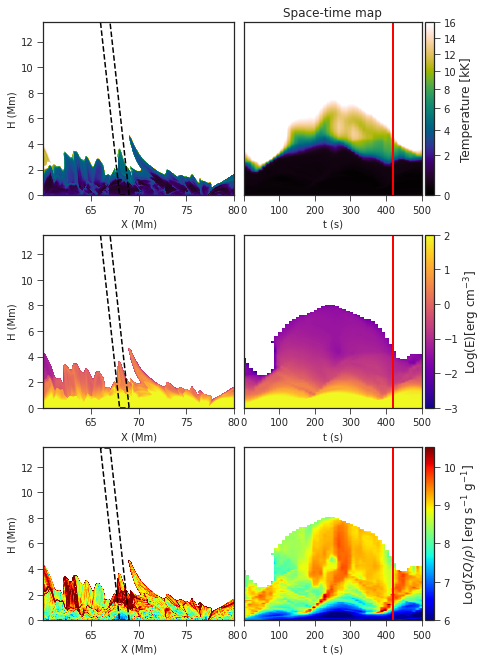

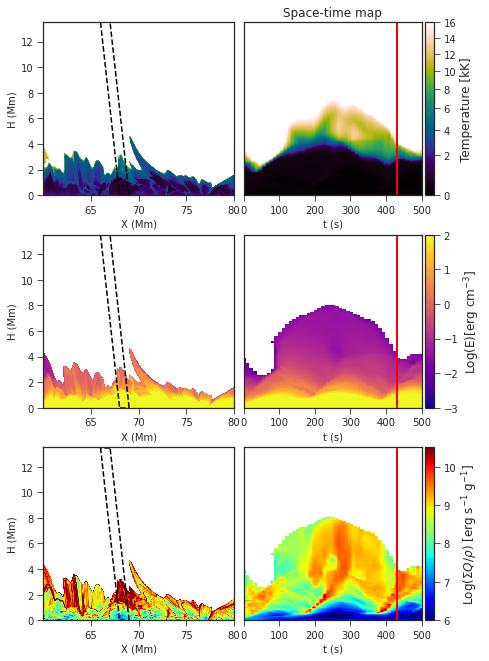

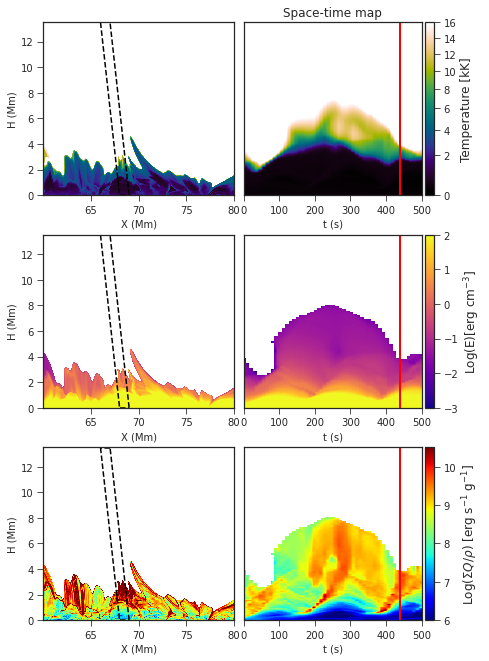

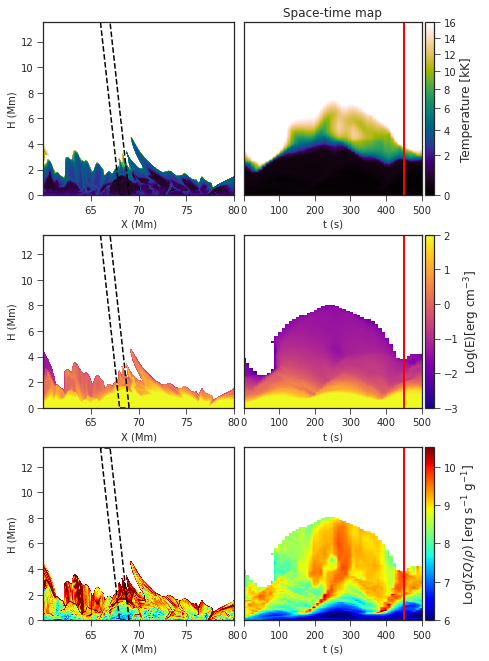

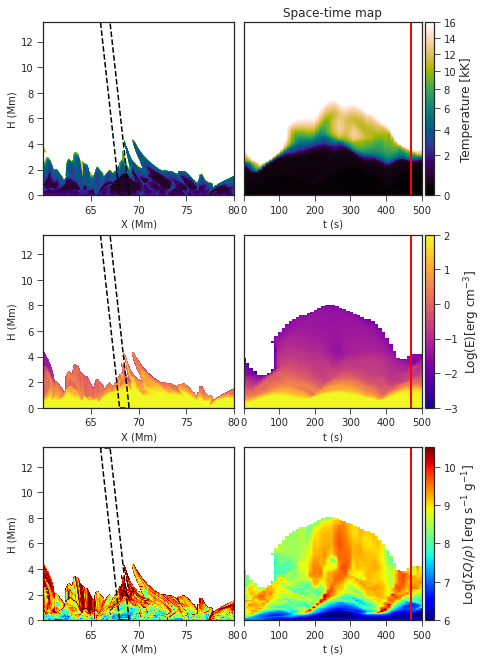

In [115]:
plt.style.use('seaborn-ticks')
for scan in tqdm(range(50)):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,11))
    fig.subplots_adjust(hspace = 0.23,wspace=0.05)
    axs=axs.ravel()
    norm1 = cm.colors.Normalize(vmax=1.6e4/1e3, vmin=1)
    im0 = NonUniformImage(axs[0], interpolation=None,cmap=cmr.rainforest,norm=norm1,extent=[x[4320]/1e6,x[5759]/1e6,z1[1410],z1[500]])
    im0.set_data(x[4320:5759]/1e6,z1[1410:500:-1],np.flipud(np.squeeze((temp_juan[0,4320:5759,scan,500:1410]/1e3).T)))
    axs[0].images.append(im0)
    axs[0].set_xlim(x[4320]/1e6, x[5759]/1e6)
    axs[0].set_ylim(0,13.5)
    axs[0].plot(x_values1, y_values1,linestyle='--',color='black')
    axs[0].plot(x_values2, y_values2,linestyle='--',color='black')
    axs[0].plot(x_values3, y_values3,linestyle='--',color='black')
    axs[0].plot(x_values4, y_values4,linestyle='--',color='black')
    axs[0].set_xlabel('X (Mm)')
    axs[0].set_ylabel('H (Mm)')
    # divider = make_axes_locatable(axs[0])
    # cax0 = divider.append_axes("right", size="5%", pad=0.05)
    # plt.colorbar(im0,cax=cax0)

    im1=axs[1].imshow((T_xt_slit[:,:50]/1e3),aspect='auto',cmap=cmr.rainforest,vmax=16,norm=colors.PowerNorm(gamma=0.7),extent=[x2[0],x2[50],z1[1410],z1[500]])
    axs[1].set_yticks([])
    divider = make_axes_locatable(axs[1])
    cax0 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im1,cax=cax0)
    cbar.set_label('Temperature [kK]',size=12)
    axs[1].set_xlabel(r't (s)')
    axs[1].set_title('Space-time map')
    axs[1].axvline(x=x2[scan],color='red',linestyle='-',linewidth=2)

    mask_contour=np.zeros((1439,910))
    temp_for_contour = temp_juan[0,4320:5759,scan,500:1410]
    w_pixels = np.where(temp_for_contour<=80000)
    mask_contour[w_pixels]=1.


    norm2 = cm.colors.Normalize(vmax=2, vmin=-3)
    im2 = NonUniformImage(axs[2], interpolation=None, extent=[x[4320]/1e6,x[5759]/1e6,z1[1410],z1[500]],cmap='plasma',norm=norm2)
    im2.set_data(x[4320:5759]/1e6,z1[1410:500:-1],np.flipud(np.squeeze(np.log10((e[4320:5759,scan,500:1410]*mask_contour).T*1e5))))
    axs[2].images.append(im2)
    axs[2].set_xlim(x[4320]/1e6, x[5759]/1e6)
    axs[2].set_ylim(0,13.5)
    axs[2].plot(x_values1, y_values1,linestyle='--',color='black')
    axs[2].plot(x_values2, y_values2,linestyle='--',color='black')
    axs[2].plot(x_values3, y_values3,linestyle='--',color='black')
    axs[2].plot(x_values4, y_values4,linestyle='--',color='black')
    axs[2].set_xlabel('X (Mm)')
    axs[2].set_ylabel('H (Mm)')

    im3=axs[3].imshow(np.log10(E_xt_slit[:,:50]),aspect='auto',cmap ='plasma',vmin=-3,vmax=2,extent=[x2[0],x2[50],z1[1410],z1[500]])
    axs[3].set_yticks([])
    divider = make_axes_locatable(axs[3])
    cax3 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im3,cax=cax3)
    cbar.set_label(r'Log(E)[erg cm$^{-3}$]',size=12)
    axs[3].set_xlabel(r't (s)')
    #axs[3].set_title('Space-time map')
    axs[3].axvline(x=x2[scan],color='red',linestyle='-',linewidth=2)

    Summed_Q = Qjoule[4320:5759,scan,500:1410]+Qjamb[4320:5759,scan,500:1410]+Qvisc[4320:5759,scan,500:1410]+Qspitz[4320:5759,scan,500:1410]
    Summed_Q = (1e-20+Summed_Q)*1e3
    den = (1e-20+p[4320:5759,scan,500:1410])*1e-7
    heat_part = (Summed_Q/den)*mask_contour
    
    norm2 = cm.colors.Normalize(vmax=10.5, vmin=6)
    im2 = NonUniformImage(axs[4], interpolation=None, extent=[x[4320]/1e6,x[5759]/1e6,z1[1410],z1[500]],cmap='jet',norm=norm2)
    im2.set_data(x[4320:5759]/1e6,z1[1410:500:-1],np.flipud(np.squeeze(np.log10(np.abs(heat_part.T)))))
    axs[4].images.append(im2)
    axs[4].set_xlim(x[4320]/1e6, x[5759]/1e6)
    axs[4].set_ylim(0,13.5)
    axs[4].plot(x_values1, y_values1,linestyle='--',color='black')
    axs[4].plot(x_values2, y_values2,linestyle='--',color='black')
    axs[4].plot(x_values3, y_values3,linestyle='--',color='black')
    axs[4].plot(x_values4, y_values4,linestyle='--',color='black')
    axs[4].set_xlabel('X (Mm)')
    axs[4].set_ylabel('H (Mm)')

    im3=axs[5].imshow(np.log10(heat_xt_slit[:,:50]),aspect='auto',cmap ='jet',vmin=6,vmax=10.5,extent=[x2[0],x2[50],z1[1410],z1[500]])
    axs[5].set_yticks([])
    divider = make_axes_locatable(axs[5])
    cax3 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im3,cax=cax3)
    cbar.set_label(r'Log($\Sigma$$Q$/$\rho$) [erg s$^{-1}$ g$^{-1}$]',size=12)
    axs[5].set_xlabel(r't (s)')
    #axs[3].set_title('Space-time map')
    axs[5].axvline(x=x2[scan],color='red',linestyle='-',linewidth=2)
    plt.savefig('/mn/stornext/d9/souvikb/High_impact/Juan_simulation/Energy_density-'+str(scan)+'.png',dpi=300,orientation='landscape',bbox_inches = 'tight',pad_innches=0.1)






In [93]:
3.5*3

10.5